In [58]:
import seaborn as sns
import joblib

In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import

In [213]:
df = pd.read_csv('NYSCounties_PCPNTMAXTAVG_SIZECOUNT.csv',index_col=0)
df.head()

,Code FIPS,Année,Mois,TMAX,TAVG,Précipitations,Etendue des feux,Nombre de feux
0,1,1992,1,32.4,23.7,1.82,0.0,0
1,1,1993,1,34.2,26.0,1.86,0.0,0
2,1,1994,1,23.3,12.4,3.48,0.0,0
3,1,1995,1,37.1,30.0,2.44,0.0,0
4,1,1996,1,30.0,20.1,5.45,0.0,0


In [170]:
groupbyMonth = df.groupby('Mois').agg({'Nombre de feux':'sum','TMAX':'mean','TAVG':'mean','Précipitations':'mean'})
groupbyMonth

,Nombre de feux,TMAX,TAVG,Précipitations
Mois,,,,
1,1305,31.499597,23.156250,3.005128
2,1446,33.495968,24.483199,2.365511
3,7142,42.580578,33.027016,3.241626
4,21652,56.250605,45.357527,3.505074
5,12205,67.955108,56.632527,3.615659
6,6174,76.219288,65.595497,4.490054
7,7413,80.307124,69.914046,4.093582
8,6181,78.791263,68.362769,3.941411
9,5002,71.803763,61.468548,4.170833


<Axes: xlabel='Mois', ylabel='Nombre de feux'>

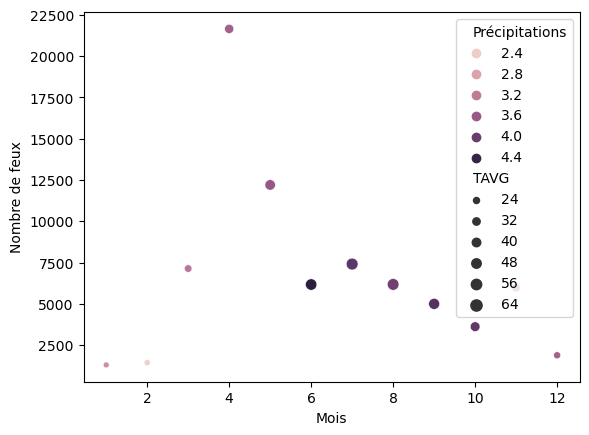

In [179]:
sns.scatterplot(data=groupbyMonth,x='Mois',y='Nombre de feux',hue='Précipitations',size='TAVG')

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17856 entries, 0 to 17855
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code FIPS         17856 non-null  int64  
 1   Année             17856 non-null  int64  
 2   Mois              17856 non-null  int64  
 3   TMAX              17856 non-null  float64
 4   TAVG              17856 non-null  float64
 5   Précipitations    17856 non-null  float64
 6   Etendue des feux  17856 non-null  float64
 7   Nombre de feux    17856 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 1.2 MB


In [215]:
county = pd.get_dummies(df['Code FIPS'],prefix='County', prefix_sep='_')

In [216]:
date = pd.get_dummies(df['Année'],prefix='Y', prefix_sep='_')

In [217]:
mois = pd.get_dummies(df['Mois'],prefix='M', prefix_sep='_')

In [218]:
df = df.join(mois)

In [219]:
df = df.join(date)

In [220]:
df = df.join(county)

In [221]:
df.drop(columns=['Année','Code FIPS'],inplace=True)

In [222]:
df.drop(columns=['Mois'],inplace=True)

In [223]:
df.head()

,TMAX,TAVG,Précipitations,Etendue des feux,Nombre de feux,M_1,M_2,M_3,M_4,M_5,...,County_105,County_107,County_109,County_111,County_113,County_115,County_117,County_119,County_121,County_123
0,32.4,23.7,1.82,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34.2,26.0,1.86,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23.3,12.4,3.48,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,37.1,30.0,2.44,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30.0,20.1,5.45,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [224]:
features = df.drop(columns=['Etendue des feux','Nombre de feux'])
etendue = df.loc[:,'Etendue des feux']
nbre = df.loc[:,'Nombre de feux']

# RandomForestRegressor

### Number of fires

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
X_train,X_test,y_train,y_test = train_test_split(features,nbre,random_state=42,test_size=0.3)

In [227]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [231]:
print('score train : ',regressor.score(X_train,y_train))
print('score test : ',regressor.score(X_test,y_test))

score train :  0.9351189427148282
score test :  0.5309322618969916


In [228]:
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test, columns=['predictions'])
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train, columns=['predictions'])

In [229]:
import sklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [230]:
rfr_mse_test = mean_squared_error(y_test,y_pred_test)
rfr_mae_test = mean_absolute_error(y_test,y_pred_test)
print('MSE_test = ',rfr_mse_test)
print('MAE_test = ',rfr_mae_test)

rfr_mse_train = mean_squared_error(y_train,y_pred_train)
rfr_mae_train = mean_absolute_error(y_train,y_pred_train)
print('MSE_train = ',rfr_mse_train)
print('MAE_train = ',rfr_mae_train)

MSE_test =  52.780966175098
MAE_test =  2.9491133096882587
MSE_train =  6.843236290903272
MAE_train =  1.076446115689255


In [238]:
X_train,X_test,y_train,y_test = train_test_split(features,etendue,random_state=42,test_size=0.3)

In [241]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [242]:
rfr_mse_test = mean_squared_error(y_test,y_pred_test)
rfr_mae_test = mean_absolute_error(y_test,y_pred_test)
print('MSE_test = ',rfr_mse_test)
print('MAE_test = ',rfr_mae_test)

rfr_mse_train = mean_squared_error(y_train,y_pred_train)
rfr_mae_train = mean_absolute_error(y_train,y_pred_train)
print('MSE_train = ',rfr_mse_train)
print('MAE_train = ',rfr_mae_train)

MSE_test =  3450.0361805081748
MAE_test =  6.020513189010658
MSE_train =  3408.19437028329
MAE_train =  4.5596447218190805


#### Improvement of the model:

In [232]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [233]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
regressor_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, 
                                      n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
regressor_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [234]:
regressor_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

### Application of best parameters

In [235]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators= 800,
 min_samples_split=5,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 90,
 bootstrap= False)
regressor.fit(X_train,y_train)
print('score train : ',regressor.score(X_train,y_train))
print('score test : ',regressor.score(X_test,y_test))

score train :  0.967898469371981
score test :  0.5967237272796014


In [236]:
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test, columns=['predictions'])
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train, columns=['predictions'])

In [237]:
rfr_mse_test = mean_squared_error(y_test,y_pred_test)
rfr_mae_test = mean_absolute_error(y_test,y_pred_test)
print('MSE_test = ',rfr_mse_test)
print('MAE_test = ',rfr_mae_test)

rfr_mse_train = mean_squared_error(y_train,y_pred_train)
rfr_mae_train = mean_absolute_error(y_train,y_pred_train)
print('MSE_train = ',rfr_mse_train)
print('MAE_train = ',rfr_mae_train)

MSE_test =  45.37790510973204
MAE_test =  2.8239453553212717
MSE_train =  3.38586281696444
MAE_train =  0.7645418247967505


In [86]:
joblib.dump(regressor, 'model_Rfimproved.joblib')

['model_Rfimproved.joblib']

In [161]:
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor()
cross_val_score(regressor, X_train, y_train, cv = 5)

array([-0.09012687, -0.08342156, -0.09464049, -0.06868929, -0.08566182])

In [162]:
from sklearn.model_selection import ShuffleSplit

model=RandomForestRegressor()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
results=cross_val_score(model,X_train,y_train,cv=ssplit)

print(results)
print(np.mean(results))

[0.53560007 0.52673727 0.50755727 0.499738   0.56280916 0.52875791
 0.4674102  0.46906509 0.52020358 0.53638466]
0.5154263212823895


#### GridSearch

In [87]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [88]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

In [89]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators= 100,
 min_samples_split=12,
 min_samples_leaf= 3,
 max_features= 3,
 max_depth= 80,
 bootstrap= True)
regressor.fit(X_train,y_train)
print('score train : ',regressor.score(X_train,y_train))
print('score test : ',regressor.score(X_test,y_test))

score train :  0.5079010158946345
score test :  0.4204423040322176


In [90]:
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test, columns=['predictions'])
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train, columns=['predictions'])

In [91]:
rfr_mse_test = mean_squared_error(y_test,y_pred_test)
rfr_mae_test = mean_absolute_error(y_test,y_pred_test)
print('MSE_test = ',rfr_mse_test)
print('MAE_test = ',rfr_mae_test)

rfr_mse_train = mean_squared_error(y_train,y_pred_train)
rfr_mae_train = mean_absolute_error(y_train,y_pred_train)
print('MSE_train = ',rfr_mse_train)
print('MAE_train = ',rfr_mae_train)

MSE_test =  65.2136411493636
MAE_test =  3.7153051792383454
MSE_train =  51.903433261654115
MAE_train =  3.4639473498525266


#### Autres modèles

In [34]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)
print('score train : ',regressor.score(X_train,y_train))
print('score test : ',regressor.score(X_test,y_test))

score train :  1.0
score test :  0.2860953291361038


In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train,y_train)
print('score train : ',regressor.score(X_train,y_train))
print('score test : ',regressor.score(X_test,y_test))

score train :  0.4254177443924786
score test :  0.38986345410270273


In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [95]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [159]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_scaled,y_train)
print('score train : ',regressor.score(X_train_scaled,y_train))
print('score test : ',regressor.score(X_test_scaled,y_test))

score train :  0.3090399849745221
score test :  0.26848076072115645


In [160]:
features.head()

,TMAX,TAVG,Précipitations,M_1,M_2,M_3,M_4,M_5,M_6,M_7,...,County_105,County_107,County_109,County_111,County_113,County_115,County_117,County_119,County_121,County_123
0,32.4,23.7,1.82,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34.2,26.0,1.86,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23.3,12.4,3.48,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,37.1,30.0,2.44,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30.0,20.1,5.45,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Bagging Regressor

In [145]:
X_train,X_test,y_train,y_test = train_test_split(features,nbre,random_state=42,test_size=0.3)

In [146]:
from sklearn.ensemble import BaggingRegressor
regressor = BaggingRegressor()
regressor.fit(X_train,y_train)
print('score train : ',regressor.score(X_train,y_train))
print('score test : ',regressor.score(X_test,y_test))

score train :  0.9170331692068686
score test :  0.5075426912829325


In [147]:
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test, columns=['predictions'])
y_pred_train = regressor.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train, columns=['predictions'])

In [148]:
rfr_mse_test = mean_squared_error(y_test,y_pred_test)
rfr_mae_test = mean_absolute_error(y_test,y_pred_test)
print('MSE_test = ',rfr_mse_test)
print('MAE_test = ',rfr_mae_test)

rfr_mse_train = mean_squared_error(y_train,y_pred_train)
rfr_mae_train = mean_absolute_error(y_train,y_pred_train)
print('MSE_train = ',rfr_mse_train)
print('MAE_train = ',rfr_mae_train)

MSE_test =  55.41283367556468
MAE_test =  3.024696658577562
MSE_train =  8.750807264581166
MAE_train =  1.1495799663973116


In [154]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Minimum number of samples required to split a node
max_samples = [x / 10 for x in range(1, 11)]
# Number of features to consider at every split
max_features = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.90, 0.92, 0.95, 1.0]
# Method of selecting samples for training each tree
bootstrap = [True, False]
bootstrap_features= [True, False]
oob_score= [True, False]
warm_start= [True,False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_samples': max_samples,
               'max_features': max_features,
               'bootstrap': bootstrap,
               'bootstrap_features': bootstrap_features,
               'oob_score': oob_score,
              'warm_start':warm_start}
print(random_grid)
#['base_estimator', 'bootstrap', 'bootstrap_features',
#'estimator','max_features', 'max_samples',  'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.92, 0.95, 1.0], 'bootstrap': [True, False], 'bootstrap_features': [True, False], 'oob_score': [True, False], 'warm_start': [True, False]}


In [155]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor = BaggingRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
regressor_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, 
                                      n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
regressor_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\norac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
102 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
51 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\norac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\norac\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 337, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\norac\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 432, in _fit
    raise ValueError("Out of bag es

RandomizedSearchCV(cv=3, estimator=BaggingRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'bootstrap_features': [True, False],
                                        'max_features': [0.1, 0.2, 0.3, 0.4,
                                                         0.5, 0.6, 0.7, 0.8,
                                                         0.85, 0.9, 0.92, 0.95,
                                                         1.0],
                                        'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                        0.6, 0.7, 0.8, 0.9,
                                                        1.0],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000],
                                        'oob_score': [True, False],
                                        'warm_start': [True, False]},
                   random_state=42, verbose=2)

In [156]:
regressor_random.best_params_

{'warm_start': True,
 'oob_score': False,
 'n_estimators': 1400,
 'max_samples': 0.7,
 'max_features': 0.85,
 'bootstrap_features': False,
 'bootstrap': True}

In [157]:
from sklearn.ensemble import BaggingRegressor
regressor = BaggingRegressor(warm_start= True,
 oob_score= False,
 n_estimators=1400,
 max_samples= 0.7,
 max_features= 0.85,
 bootstrap_features= False,
 bootstrap= True)
regressor.fit(X_train,y_train)
print('score train : ',regressor.score(X_train,y_train))
print('score test : ',regressor.score(X_test,y_test))

score train :  0.8933377457336996
score test :  0.5478501830394917
